#Все импорты

In [6]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import pandas as pd

#Подключение к г. диску, формирование датафреймов

In [7]:
data_path = '/content/drive/MyDrive/ML/COOKIE/info/data/'

# stand1_1_df = pd.read_csv(data_path + 'train_dataset_1/телеметрия/data2024-06-01.csv', index_col = 0)
# stand1_2_df = pd.read_csv(data_path + 'train_dataset_1/телеметрия/data2024-08-23.csv', index_col = 0)

stand2_1_df = pd.read_csv(data_path + 'train_dataset_2/телеметрия/data2024-05-26.csv', index_col = 0)
stand2_2_df = pd.read_csv(data_path + 'train_dataset_2/телеметрия/data2024-05-27.csv', index_col = 0)
stand2_3_df = pd.read_csv(data_path + 'train_dataset_2/телеметрия/data2024-05-29.csv', index_col = 0)


stand2_df = pd.concat([stand2_1_df, stand2_2_df, stand2_3_df])

In [8]:
stand2_3_df.shape

(402, 20)

#Вспомогательные функции

In [12]:
# corr matrix
def print_corr_matrix(df, title):
  df_corr = round(df.corr(), 3)

  plt.figure(figsize=(14, 8))
  sns.heatmap(df_corr, annot=True, cmap='coolwarm')

  plt.title(title)
  plt.show()

def get_outliers_idx (df, feature):
  IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
  low = df[feature].quantile(0.25) - (IQR * 1.5)
  up = df[feature].quantile(0.75) + (IQR * 1.5)
  borders = (low, up)
  outliers = pd.concat([df[feature] < low, df[feature] > up], axis=1)
  outliers_index = outliers.any(axis=1)
  return outliers_index

def print_box_plots(df):
  for column in df.columns:
    fig = px.box(df, y=column)
    fig.update_layout(title=column)
    fig.show()

#Матрицы корреляции по дням

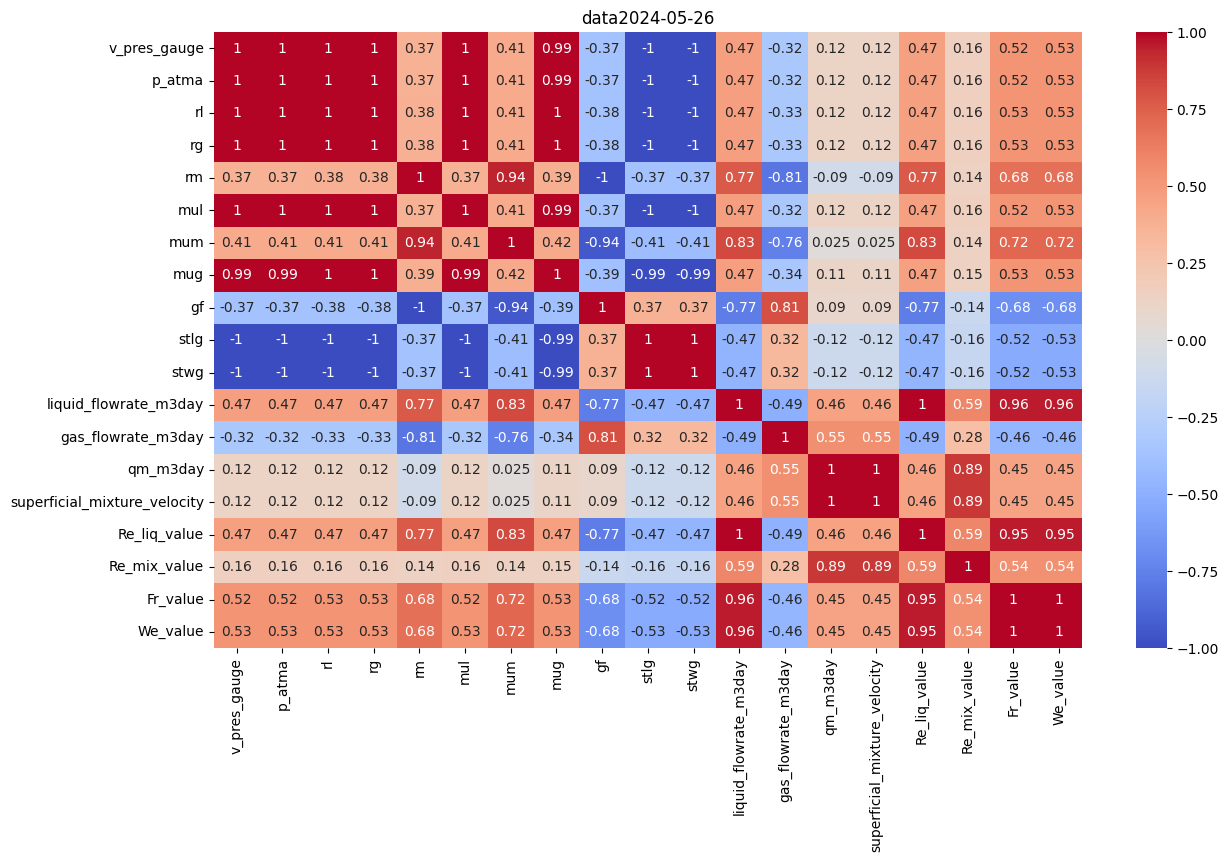

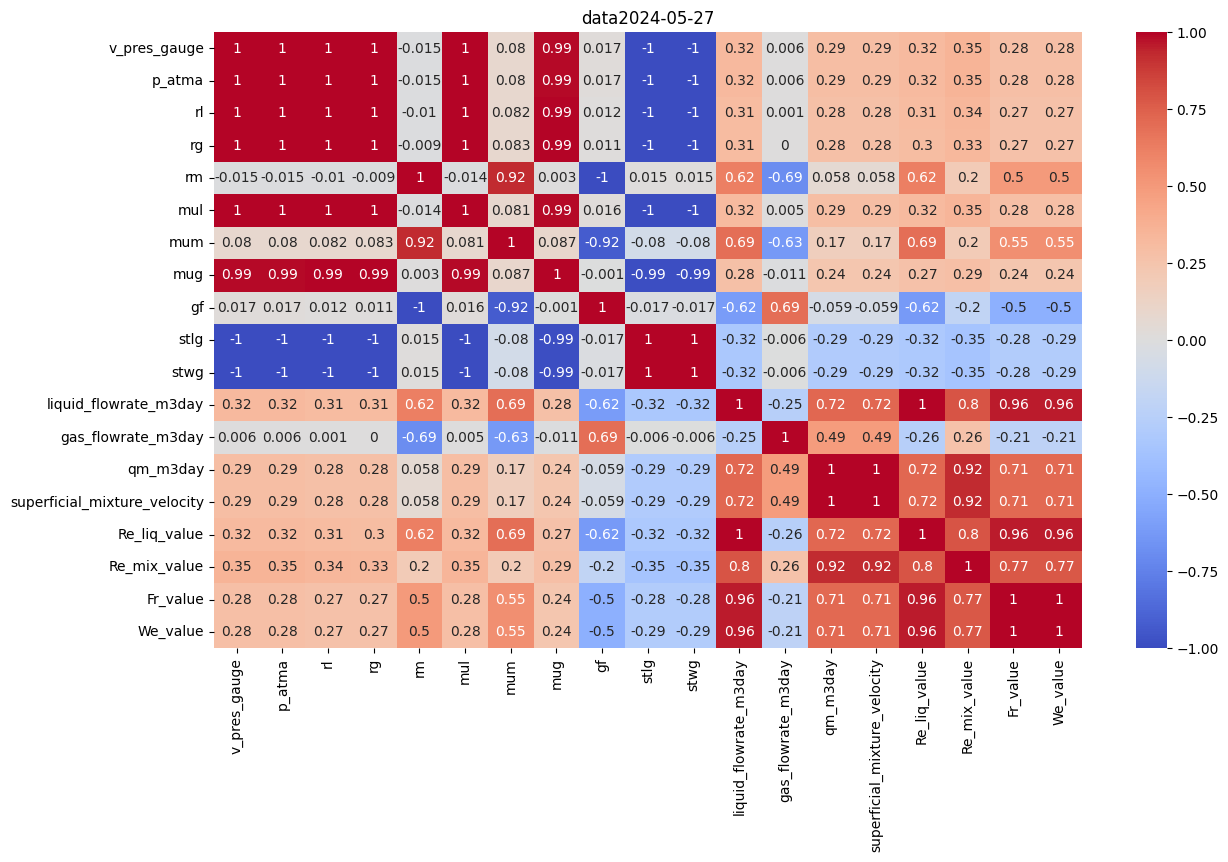

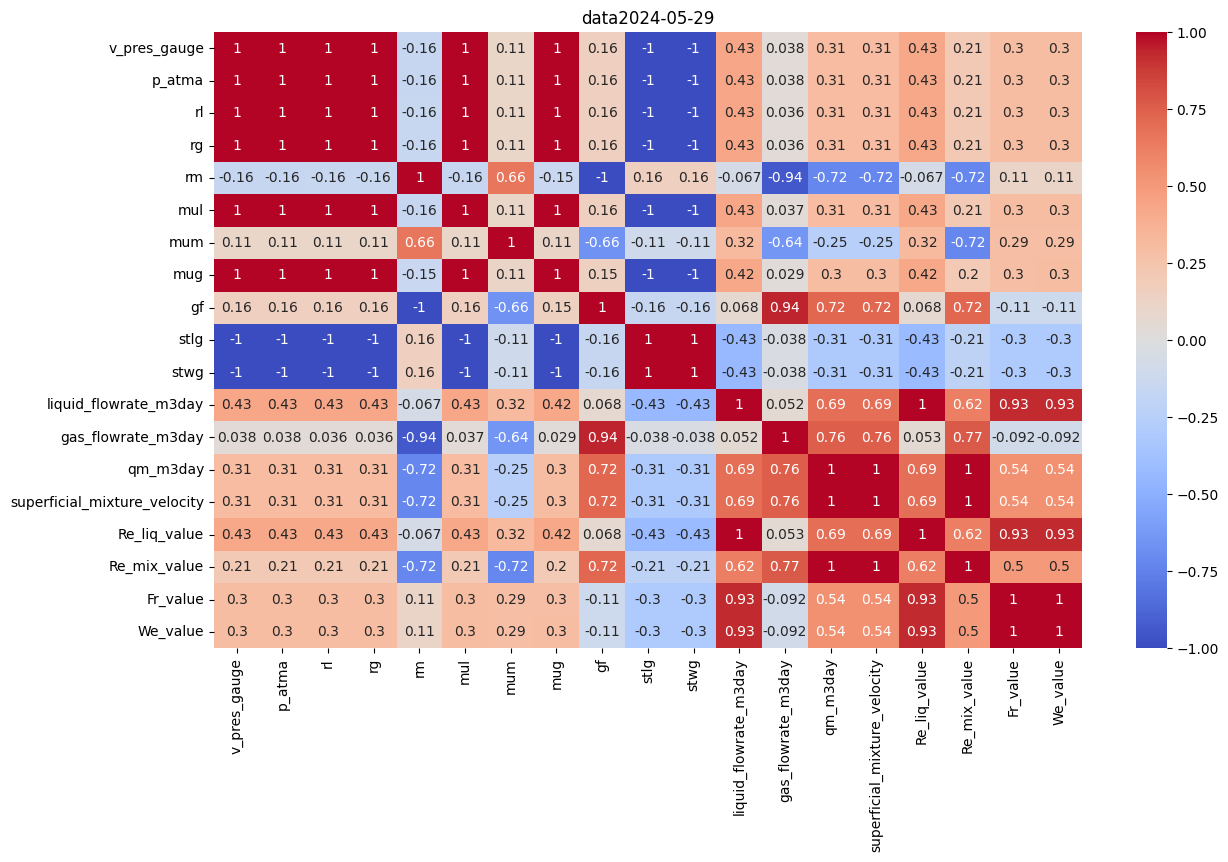

In [13]:
num_stand2_1_df = stand2_1_df.drop('t', axis = 1)
num_stand2_2_df = stand2_2_df.drop('t', axis = 1)
num_stand2_3_df = stand2_3_df.drop('t', axis = 1)

print_corr_matrix(num_stand2_1_df, 'data2024-05-26')
print_corr_matrix(num_stand2_2_df, 'data2024-05-27')
print_corr_matrix(num_stand2_3_df, 'data2024-05-29')

#EDA по

In [ ]:
stand2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1049 entries, 0 to 401
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   t                             1049 non-null   object 
 1   v_pres_gauge                  1049 non-null   float64
 2   p_atma                        1049 non-null   float64
 3   rl                            1049 non-null   float64
 4   rg                            1049 non-null   float64
 5   rm                            1049 non-null   float64
 6   mul                           1049 non-null   float64
 7   mum                           1049 non-null   float64
 8   mug                           1049 non-null   float64
 9   gf                            1049 non-null   float64
 10  stlg                          1049 non-null   float64
 11  stwg                          1049 non-null   float64
 12  liquid_flowrate_m3day         1049 non-null   float64
 13  gas_flowr

Re_mix_value – число Рейнольдса для газа

In [ ]:
stand2_df['t'] = pd.to_datetime(stand2_df['t'])

In [ ]:
nan_rows = stand2_df[stand2_df['Re_mix_value'].isna()]
nan_rows

,t,v_pres_gauge,p_atma,rl,rg,rm,mul,mum,mug,gf,stlg,stwg,liquid_flowrate_m3day,gas_flowrate_m3day,qm_m3day,superficial_mixture_velocity,Re_liq_value,Re_mix_value,Fr_value,We_value
0,2024-05-26 10:21:00,1.000000,1.987167,998.525684,2.446262,998.525684,0.979126,0.0,0.009249,0.0,0.064535,0.064535,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1,2024-05-26 10:44:00,0.954241,1.941995,998.525350,2.390019,998.525350,0.979100,0.0,0.009248,0.0,0.064536,0.064536,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
207,2024-05-26 14:14:00,0.988390,1.975706,998.525599,2.431989,998.525599,0.979120,0.0,0.009249,0.0,0.064536,0.064536,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
0,2024-05-27 09:39:00,1.000000,1.987167,998.525684,2.446262,998.525684,0.979126,0.0,0.009249,0.0,0.064535,0.064535,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
1,2024-05-27 09:40:00,1.000000,1.987167,998.525684,2.446262,998.525684,0.979126,0.0,0.009249,0.0,0.064535,0.064535,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
2,2024-05-27 09:58:00,1.000000,1.987167,998.525684,2.446262,998.525684,0.979126,0.0,0.009249,0.0,0.064535,0.064535,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
3,2024-05-27 09:59:00,1.000000,1.987167,998.525684,2.446262,998.525684,0.979126,0.0,0.009249,0.0,0.064535,0.064535,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
76,2024-05-27 11:19:00,1.014606,2.001585,998.525791,2.464220,998.525791,0.979135,0.0,0.009249,0.0,0.064535,0.064535,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
77,2024-05-27 11:27:00,1.000000,1.987167,998.525684,2.446262,998.525684,0.979126,0.0,0.009249,0.0,0.064535,0.064535,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0
299,2024-05-27 16:57:00,0.923267,1.911418,998.525124,2.351964,998.525124,0.979082,0.0,0.009247,0.0,0.064537,0.064537,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0


Re_mix_value = NaN <=> qm_m3day = 0.0

In [ ]:
stand2_df = stand2_df.fillna(0)

In [ ]:
(stand2_df == 0).sum()

,0
t,0
v_pres_gauge,0
p_atma,0
rl,0
rg,0
rm,0
mul,0
mum,24
mug,0
gf,460


*   mum - вязкость смеси, сП
*   gf - содержание газа в потоке, д,ед.
*   liquid_flowrate_m3day – расход жидкости в местных условиях, м3/сут
*   gas_flowrate_m3day - расход газа в местных условиях, м3/сут
*   qm_m3day - расход смеси в местных условиях, м3/сут
*   superficial_mixture_velocity - приведенная скорость смеси, м/с
*   Re_liq_value - число Рейнольдса для жидкости
*   Fr_value - число Фруда для смеси
*   We_value - число Вебера для смеси









In [ ]:
print_box_plots(stand2_df)

In [ ]:
for column in stand2_df.columns:
  if column == 't':
    continue
  stand2_df.loc[get_outliers_idx(stand2_df, column), column] = stand2_df[column].mode()[0]
  fig = px.box(stand2_df, y=column)
  fig.update_layout(title=column)
  fig.show()

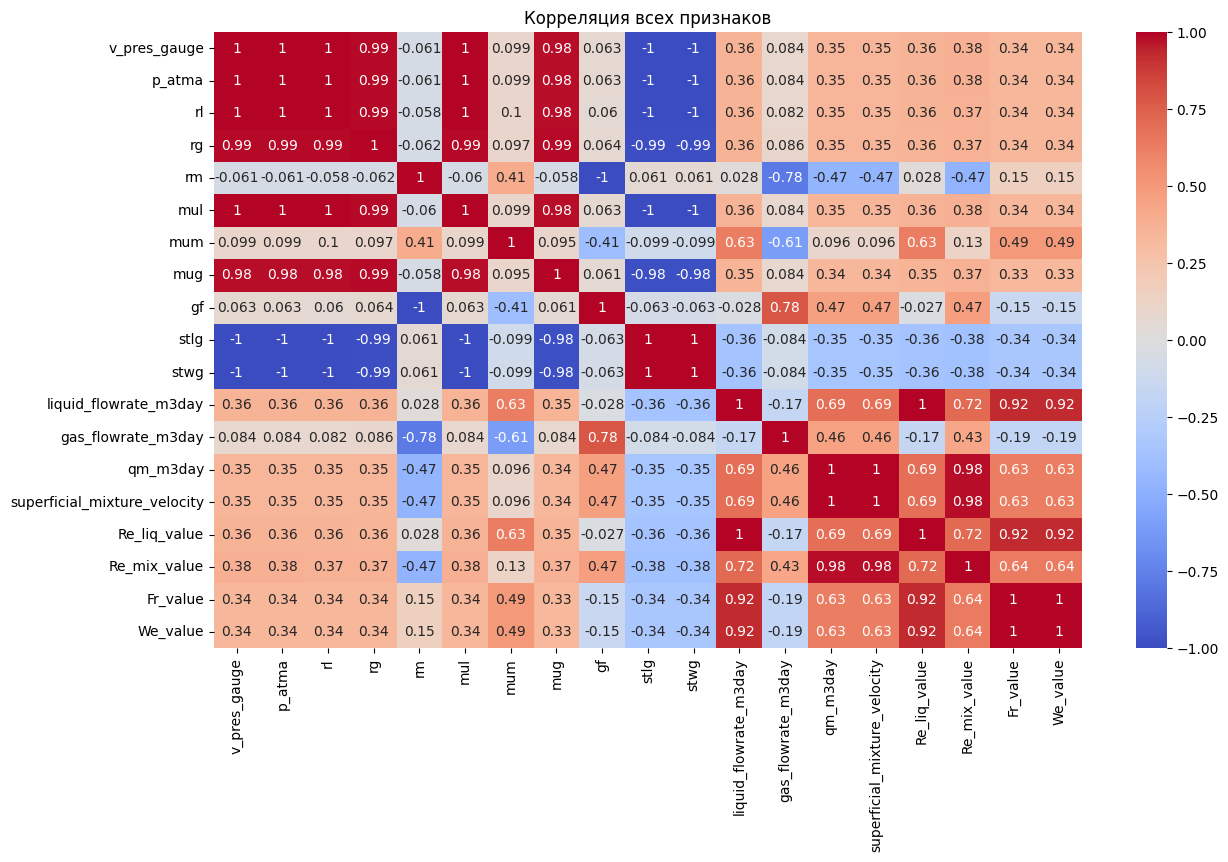

In [ ]:
num_stand2_df = stand2_df.drop('t', axis = 1)

stand2_corr = round(num_stand2_df.corr(), 3)

plt.figure(figsize=(14, 8))
sns.heatmap(stand2_corr, annot=True, cmap='coolwarm')

plt.title('Корреляция всех признаков')
plt.show()

In [ ]:
stand2_df.to_csv('stand2_df.csv')